# 1.6.Tabela de Distribuição de Frequência


Creation on August 10 2021.

Last modification on September 03 2022.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em uma grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [64]:
import numpy as np
import pandas as pd
from math import sqrt,ceil
from statistics import mean, median, mode, pstdev
import matplotlib.pyplot as plt
import matplotlib.style as style

In [65]:
style.use('seaborn')

## Variável quantitativa discreta
Definir o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados fictício sobre o número de computadores (incluindo _laptop_) e _smartphones_ de uma amostra de 170 familias da cidade A.

In [100]:
values = [
    5, 4, 1, 7, 2, 1, 5, 3, 2, 3, 5 , 6, 7, 5, 4, 4, 1, 1, 2, 5, 4, 1, 7, 8, 5, 3, 1, 5, 4, 1, 7, 5, 10, 1,
    7, 2, 1, 5, 3, 2, 3, 5 , 6, 7, 5, 4, 4, 1, 1, 2, 5, 4, 1, 7, 8, 5, 3, 1, 5, 6, 4, 3, 5, 7, 1, 2, 1, 3,
    7, 4, 6, 2, 3, 1, 5, 5, 4, 1, 7, 2, 1, 5, 3, 2, 3, 5 , 6, 7, 5, 4, 4, 1, 1, 2, 5, 4, 1, 7, 8, 5, 3, 1, 
    5, 4, 1, 7, 5, 10, 1, 7, 2, 1, 5, 3, 2, 3, 5 , 6, 7, 5, 4, 4, 1, 1, 2, 5, 4, 1, 7, 8, 5, 3, 1, 5, 6, 4, 
    3, 5, 7, 1, 2, 1, 3, 7, 4, 6, 2, 3, 1, 5, 2, 5, 7, 5, 5, 4, 3, 2, 5, 3, 5, 4, 2, 1, 5, 8, 7, 5, 10, 10,
]

In [101]:
len(values)

170

Antes da construção da tabela de distribuição de frequência, ainda com os dados brutos, podemos obter algumas informações sobre o conjunto de dados.

Tornar em ordem crescente o conjunto de dados brutos.

In [102]:
values.sort()

Obter a média, a mediana e a moda dos dados.

__Média:__ é uma medida que busca resumir, considerando todos os valores do conjunto de dados, em um valor central.

__Mediana:__ é a medida que divide o conjunto de dados __exatamente__ ao meio (em conjuntos de tamanho par é a média do dois valores centrais), por esse motivo que devemos tornar o conjunto de dados em ordem crescente.

__Moda:__ é o valor que mais se repete no conjunto de dados, pode não haver nenhum e poder haver multiplos valore modais.

O uso de uma (ou mais) medidas de tendência depende da _sensibilidade estatística_ do pesquisador, a partir do que cada uma representa e da necessidade.

In [103]:
# Mean
mean_value = np.around(mean(values),2)
print('Média: {}'.format(mean_value))

# Median
median_value = np.around(median(values),2)
print('Mediana: {}'.format(median_value))

# Mode
mode_value = np.around(mode(values),2)
print('Moda: {}'.format(mode_value))

Média: 4.01
Mediana: 4.0
Moda: 5


Neste situação, vemos que média do número de computadores e _smartphone_ das amostra de 150 familias é de 4.01, a quantidade que divide o conjunto de dados ao meio é 4 e a quantidade mais frequente no conjunto de dados é 5.

Com o conjunto de dados podemos criar um gráfico _Boxplot_

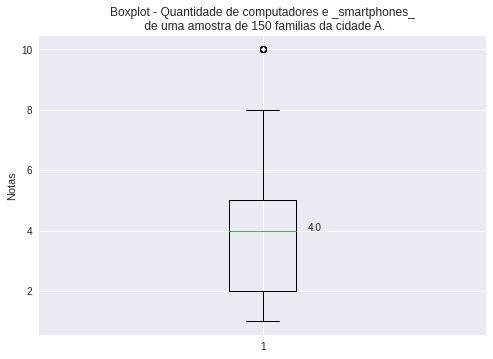

In [104]:
plt.boxplot(values)
plt.title('Boxplot - Quantidade de computadores e _smartphones_\n de uma amostra de 150 familias da cidade A.')
plt.ylabel('Quantidade')
plt.text(1.1, median_value, str(median_value))
plt.show()

Podemos observar que há _outliers_ no conjunto de dados, um _outliers_ são valores no conjunto de dados átipicos ao comportamento do restante do conjunto. Geralmente pode ser ocasionados por erros na coleta de dados ou por situações que realmentes causam esses valores átipicos no conjunto. Na amostra apresentada, uma explicação plausível para o aparecimento de _outliers_ com o valor 10 é uma familia com um número de membros com computador ou _laptop_ maior do que as outras familias.

Em situações em que ocorrem _outliers_ é neecessário uma análise do pesquisador, pois é necessário tomar uma decisão em relação a eles, de exclui-lo, de remove-lo (para ser analisado separadamente) ou mante-lo no conjunto de dados. No exemplo dado, a decisão sobre os _outliers_ é de mante-los no conjunto de dados, dado que não há indícios que seja um erro e há uma hipótese plausível em relação a eles.

Além disso, vemos uma concentração dos dados abaixo de 5 de aproximadamente 3 quartis (ou 75%) dos dados.

Para construção da tabela de distribuição de frequência precisamos compreender a nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis. A variável do exemplo dado, sobre a quantidade de computadores e smartphones de uma amostra de 150 familias da cidade A, é classificada como quantitativa discreta.

Após a classificação do tipo da variável, podemos entender melhor como ocorrerá a construção da tabela de distribuição de frequência. Primeiramente, precisamos obter o número de classes e se será com intervalo ou não, se for qual seria a amplitude delas.

A decisão sobre a tabela de distribuição de frequência será de que as classes não serão com intervalo, ao invés disso, as possíveis realizações para as ocorrências do conjunto de dados.

In [166]:
classes = list(pd.DataFrame(values).groupby(0).count().reset_index()[0])
classes.append(9)
classes.sort()
classes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Criar uma lista com a frequência absoluta de cada classe.

In [182]:
#fi: absolute frequency
fi = []
for i in range(0, len(classes)):
    frequency = 0
    for value in values:
        if value == classes[i]:    
            frequency +=1
    fi.append(frequency)
    
fi

[33, 19, 20, 22, 39, 8, 20, 5, 0, 4]

Criar uma lista com a frequência relativa de cada classe, na forma de por cento (%). Essa lista é criada a partir da lista de frequência absoluta.

In [181]:
#fi_relative: relative frequency
fi_relative = []
for value in fi:
    element = np.around(value / len(values), 2)
    element = element * 100
    fi_relative.append(element)
    
fi_relative

[19.0, 11.0, 12.0, 13.0, 23.0, 5.0, 12.0, 3.0, 0.0, 2.0]

Função _cumulate_: dado uma lista de valores, retorna uma lista com os seus valores acumulados, por exemplo, list_accumulated[0] = values[0]; list_accumulated[1] = values[0] + values[1]; e assim sucessivamente.

In [171]:
def cumulate(values):
    list_accumulated = [values[0]]
    for counter in range(1, len(values)):
        element = list_accumulated[counter - 1] + values[counter]
        element = np.around(element, 2)
        list_accumulated.append(element)
    
    return list_accumulated 

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [179]:
#fi: cumulative absolute frequency
fi_accumulated = cumulate(fi)
fi_accumulated

[33, 52, 72, 94, 133, 141, 161, 166, 166, 170]

Utilização da função _cumulate_ para obter uma lista com a frequencia absoluta acumulada.

In [180]:
#_100fi_relative: cumulative relative (in %) frequency
fi_relative_accumulated = cumulate(fi_relative)
fi_relative_accumulated

[19.0, 30.0, 42.0, 55.0, 78.0, 83.0, 95.0, 98.0, 98.0, 100.0]

Contruir o DataFrame.

In [175]:
data_names = ['Fi', 'Fi (%)', 'Fi Acumulado', 'Fi (%) Acumulado']
data_values = [fi, fi_relative, fi_accumulated, fi_relative_accumulated]

data_values = np.matrix(data_values)
data_values = data_values.reshape((4,10))
data_values = data_values.transpose()

In [177]:
frequency_distribution = pd.DataFrame(index=classes, data=data_values, columns=data_names)

In [178]:
frequency_distribution

,Fi,Fi (%),Fi Acumulado,Fi (%) Acumulado
1,33.0,19.0,33.0,19.0
2,19.0,11.0,52.0,30.0
3,20.0,12.0,72.0,42.0
4,22.0,13.0,94.0,55.0
5,39.0,23.0,133.0,78.0
6,8.0,5.0,141.0,83.0
7,20.0,12.0,161.0,95.0
8,5.0,3.0,166.0,98.0
9,0.0,0.0,166.0,98.0
10,4.0,2.0,170.0,100.0


_Plots_ com algumas informações da tabela.

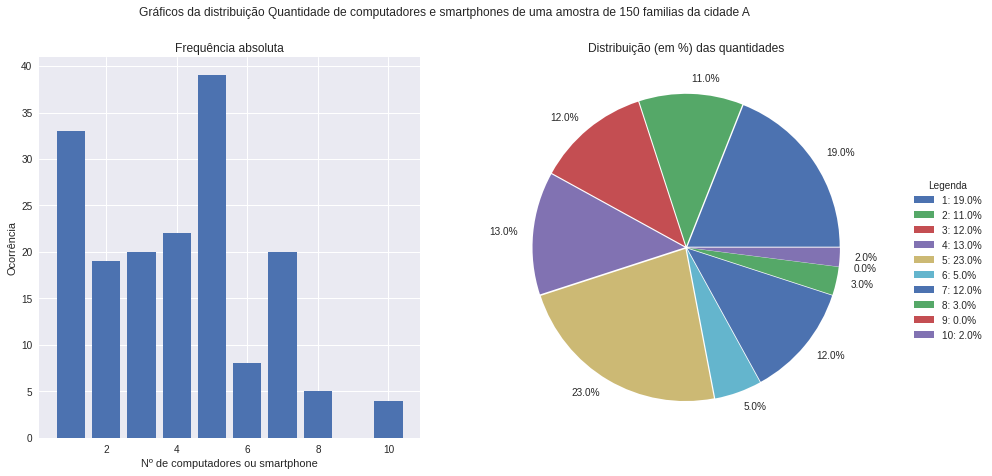

In [204]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Gráficos da distribuição Quantidade de computadores e smartphones ' 
                + 'de uma amostra de 150 familias da cidade A')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].bar(frequency_distribution.index, frequency_distribution['Fi'])
plots[0].set_title('Frequência absoluta')
plots[0].set_xlabel('Nº de computadores ou smartphone')
plots[0].set_ylabel('Ocorrência')

plots[1].pie(x=frequency_distribution['Fi (%)'], 
             labels=list(map(lambda value: '{}%'.format(value), fi_relative)), 
             explode=list(map(lambda value: 0.01, range(0, len(classes)))))
plots[1].set_title('Distribuição (em %) das quantidades')
plots[1].legend(bbox_to_anchor=(0.8,0.2,0.5,0.5), title='Legenda', 
                labels=list(map(lambda value: '{}: {}%'.format(classes[value], fi_relative[value]), 
                                range(0, len(classes)))))

plt.show()

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.